# Loading and display of an image with OpenCV

For the demonstration below we use a satellite view of Paris available here:
http://marchalouchery.free.fr/photo/photos_satellite_Paris.jpg

In [2]:
import cv2 #OpenCV package
import numpy as np #Numerical python to perform operations on arrays
import matplotlib.pyplot as pl #graphic viz
pl.rcParams['figure.dpi'] = 150 
%matplotlib inline

data_folder="./"
im_path=data_folder+"photos_satellite_Paris.jpg"
im=cv2.imread(im_path) 

The Blue, Green and Red (BGR) are loaded in the array im of size (width,height,3). You can load an single channel image (black and white) with im_bw=cv2.imread(im_path, 0)

([], <a list of 0 Text yticklabel objects>)

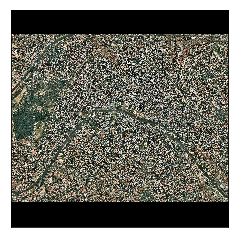

In [3]:
pl.imshow(im[:,:,::-1]) #the ::-1 converts from BGR to RGB (same as cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
pl.xticks([])
pl.yticks([])

# Computing the green index for the image

In [ ]:
Ms=np.max(im,axis=(0,1)).astype(np.float) 
im_Norm=im/Ms #bringing values of RGB intensities between 0 and 1
L=im_Norm.sum(axis=2)
green_idx=np.nan_to_num(3*im_Norm[:,:,1]/L-1) #nan result from division by 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [3]:
pl.imshow(green_idx,cmap=pl.cm.YlGn)

NameError: name 'green_idx' is not defined

(array([  1.98017000e+05,   0.00000000e+00,   1.50000000e+01,
          7.90000000e+01,   1.65000000e+02,   3.51000000e+02,
          5.33000000e+02,   5.26000000e+02,   7.54000000e+02,
          9.48000000e+02,   1.15800000e+03,   1.55100000e+03,
          1.13000000e+03,   1.71400000e+03,   1.47000000e+03,
          2.25600000e+03,   3.14400000e+03,   1.02600000e+03,
          3.10300000e+03,   1.33700000e+03,   4.38900000e+03,
          1.78400000e+03,   5.65600000e+03,   3.11400000e+03,
          6.97000000e+02,   7.93300000e+03,   4.87800000e+03,
          2.61700000e+03,   8.61000000e+03,   4.40400000e+03,
          6.55600000e+03,   5.87000000e+03,   3.24900000e+03,
          1.81970000e+04,   7.43300000e+03,   7.77000000e+03,
          1.11710000e+04,   1.16760000e+04,   1.15430000e+04,
          3.55010000e+04,   6.49300000e+03,   1.55670000e+04,
          2.40900000e+04,   1.97670000e+04,   3.38330000e+04,
          2.67860000e+04,   3.26120000e+04,   5.14070000e+04,
        

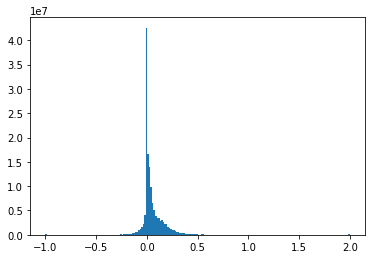

In [5]:
pl.hist(green_idx.flatten(),200)

# Choosing a threshold for the green index 

* Choosing a threshold manually

(-0.5, 899.5, 799.5, -0.5)

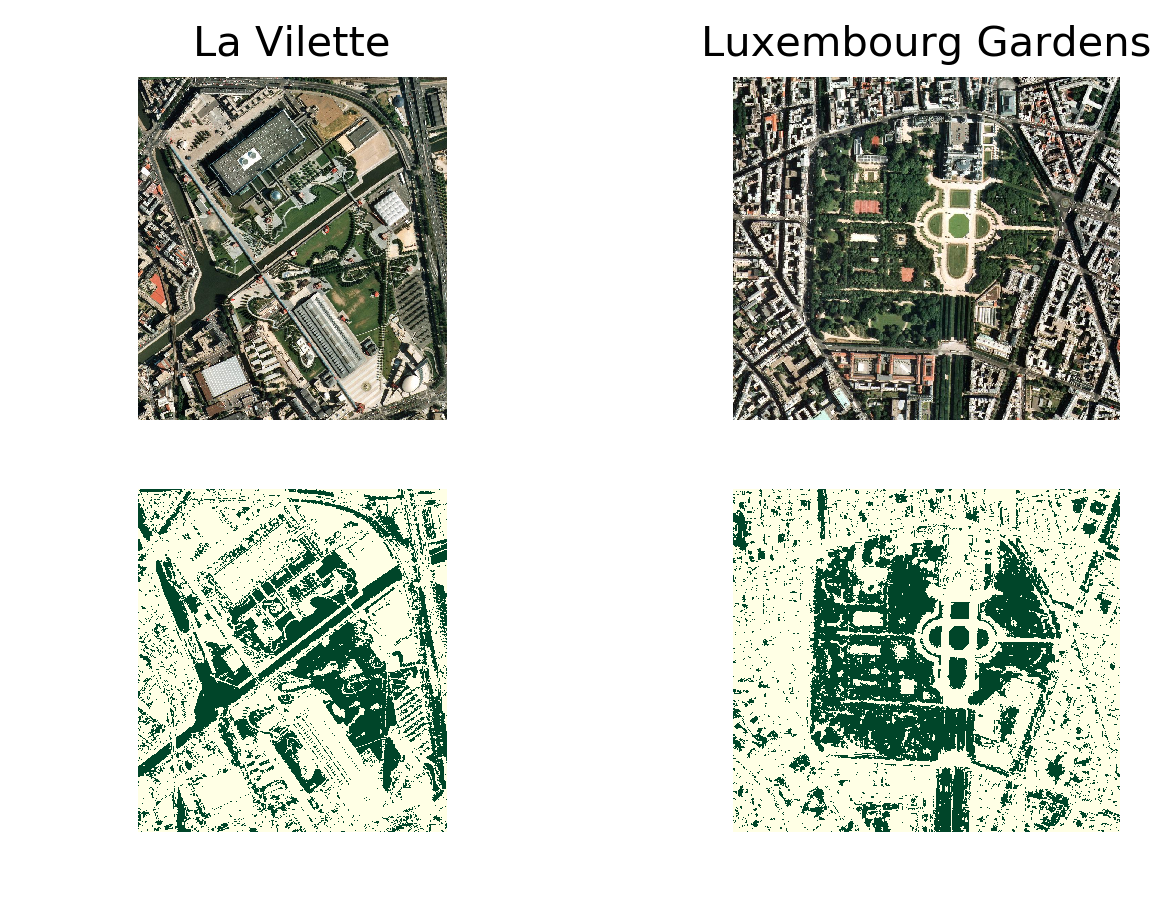

In [39]:
pl.rcParams['figure.dpi'] = 250 
pl.subplot(221)
pl.imshow(im[1800:2800,10800:11700,::-1])
pl.axis("off")
pl.title("La Vilette")
pl.subplot(223)
pl.imshow(green_idx[1800:2800,10800:11700]>.1, cmap=pl.cm.YlGn)
pl.axis("off")
pl.subplot(222)
pl.imshow(im[7100:7900,6900:7800,::-1])
pl.axis("off")
pl.title("Luxembourg Gardens")
pl.subplot(224)
pl.imshow(green_idx[7100:7900,6900:7800]>.1, cmap=pl.cm.YlGn)
pl.axis("off")

* Automatic thresholding 

(-0.5, 899.5, 799.5, -0.5)

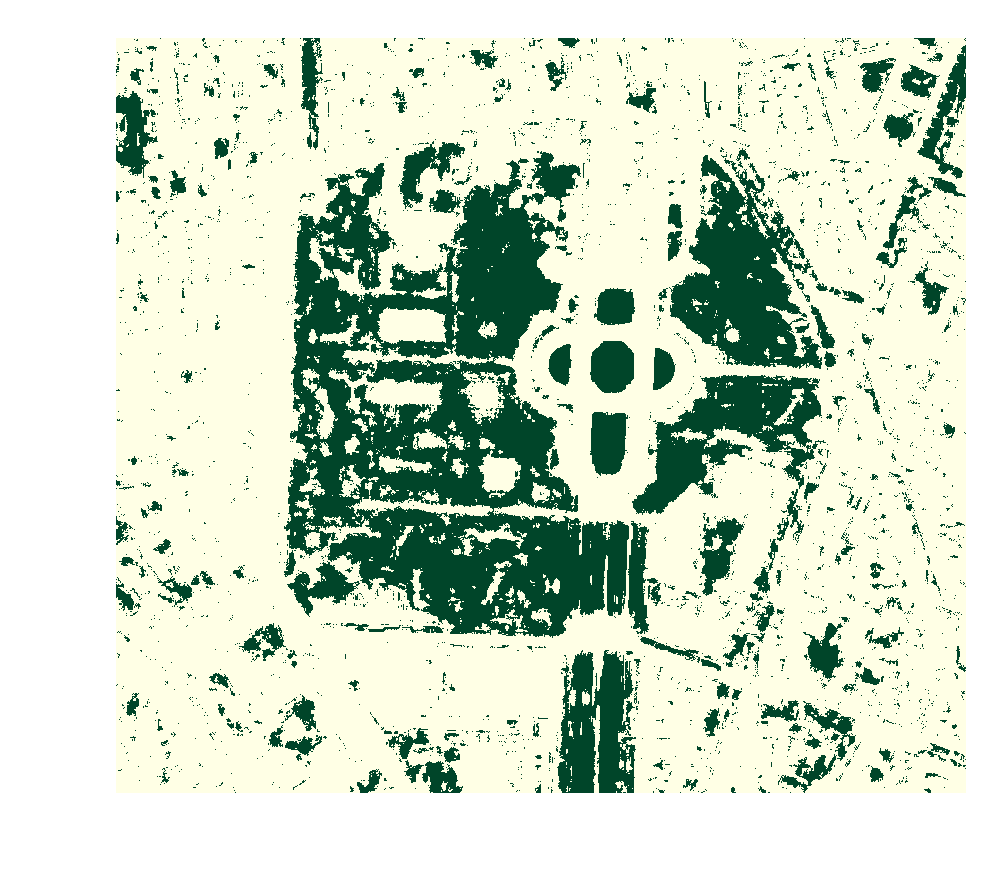

In [40]:
M=green_idx.max()
m=green_idx.min()
gidx= (255*(green_idx-m)/(M-m)).astype(np.uint8)
gidx_filtered=cv2.bilateralFilter(gidx, 11, 5, 17)
th, mask=cv2.threshold(gidx_filtered,0,255,cv2.THRESH_OTSU)
pl.imshow(mask[7100:7900,6900:7800], cmap=pl.cm.YlGn)
pl.axis("off")

* Morphological operations to keep the largest segments

(-0.5, 11999.5, 11999.5, -0.5)

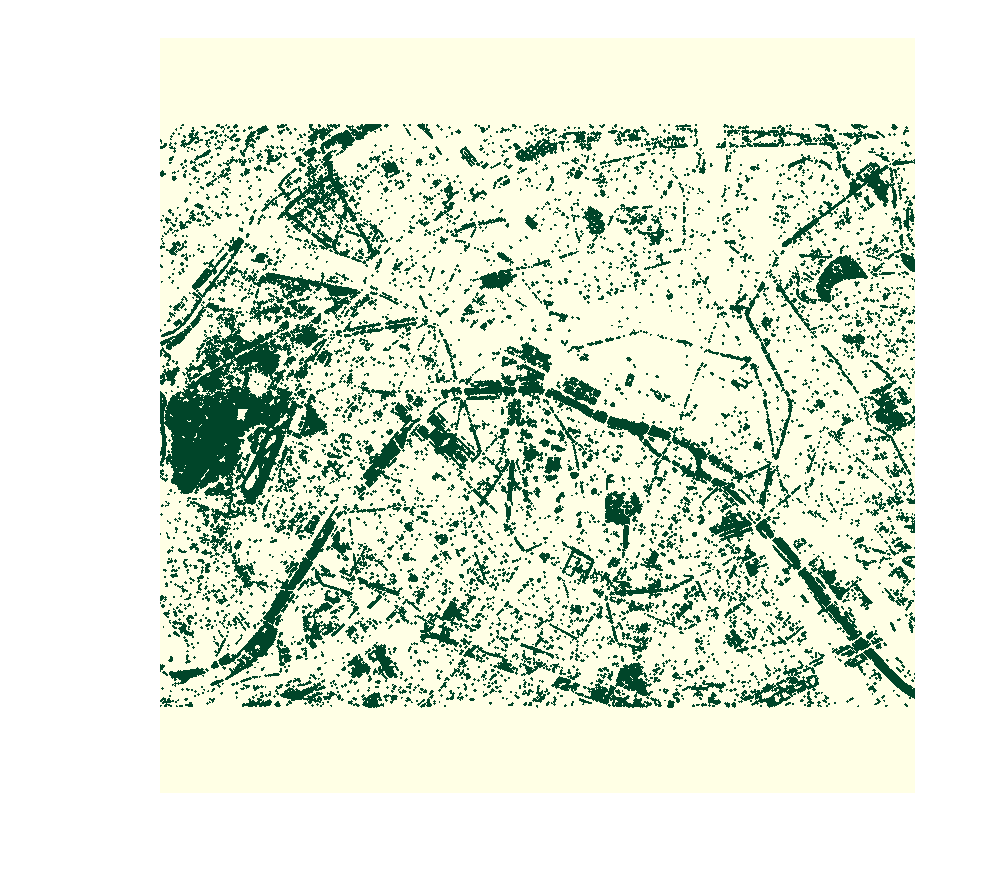

In [50]:
kr=np.ones((3,3)).astype(np.uint8)
kr[[0,0,2,2],[0,2,2,0]]=0

omask=cv2.morphologyEx(mask, cv2.MORPH_OPEN, kr, iterations=5)
dmask=cv2.dilate(omask,kernel=kr,iterations=15)
pl.imshow(dmask, cmap=pl.cm.YlGn)
pl.axis("off")

In [51]:
Ms


array([ 255.,  255.,  255.])